<a href="https://colab.research.google.com/github/christophermalone/stat360/blob/main/HW3_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW #3 : Predicting Price of Cars & Pickups - Solution


<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

## Find Cars Dataset

Consider the following data collected from the FindCars.com website in Fall 2021.  Findcars provides information on cars for sale in our geographic region.  
<table>
  <tr>
    <td width='50%'>
      <ul>
        <li><strong>Response Variable</strong>: Price ($)</li><br>
        <li>Variables under investigation (i.e. independent variables)</li>
        <ul>
          <li>CarType, e.g. car, pickup, suv, etc.</li>
          <li>Miles</li>
         </ul>
    </ul>
    </td>
    <td width='50%'>
    <p align='center'><img src="https://drive.google.com/uc?export=view&id=14154g-4S0k9eGsqD8xlEmGahpyX79dH2" width="50%" height="50%"></img></p>
      
  </td>
</tr>
</table>

Data Folder: [OneDrive](https://mnscu-my.sharepoint.com/:f:/g/personal/aq7839yd_minnstate_edu/EmOQfrwxzzRBqq8PH_8qTmMBy-1qKgM11Hb8vzjs025EEA?e=wyShYs)



<table width='100%' ><tr><td bgcolor='green'></td></tr></table>



## Load Data into R via URL

The tidyverse R package will be used to assist with reading in the dataset into the current R session.

In [3]:
#@title Load Tidyverse
#load tidyverse package
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Read in the data

In [4]:
#@title Read in Data

# Reading data in using read_csv 
FindCars <- read_csv("http://www.StatsClass.org/stat360/Datasets/FindCars.csv")

Rows: 8037 Columns: 15

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (12): Description, Make, Call For Price, CarType, ForeignBased, Engine, ...
dbl  (3): Year, Price, Miles


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [ ]:
#@title View the first few rows of data
head(FindCars)

## Obtaining the Car data.frame

The model to be fit to data that meet the following conditions.  A filter() can be used in subset the data.


*   CarType = Car
*   Car should have mileage between 25000 and 100000



In [6]:
FindCars_CarsOnly <- (FindCars
  %>% filter(CarType == "Car" & Miles > 25000 & Miles < 100000)
)

### Setup for Model #1

Consider the following setup for the simple linear regression model.

<ul>
  <li><strong>Response Variable</strong>: Price</li>
  <li><strong>Independent / Predictor Variable</strong>: Mileage</li>
  <li><i>Assume</i> the following structure for the mean and variance functions</li>
  </ul>

<ul><ul>
  <li>$E(Price | Miles, CarType=Car) = \beta_{0} + \beta_{1} * Miles$</li>
  <li>$Var(Price | Miles, , CarType=Car) = \sigma^{2}$</li>
</ul></ul>

### Scatterplot

Warning message:
“Removed 26 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 26 rows containing missing values (geom_point).”


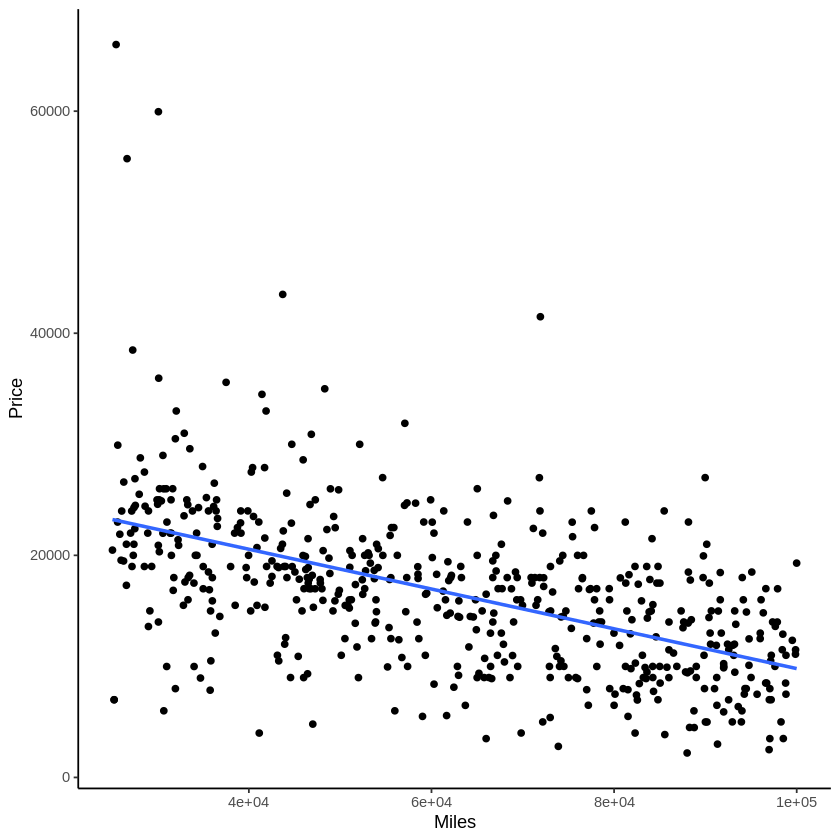

In [8]:
ggplot(data = FindCars_CarsOnly, aes(x=Miles, y=Price)) +
  geom_point() +
  geom_smooth(method='lm', formula = y ~ x, se=FALSE) +  
  theme_classic()

### Fitting Model #1

In [11]:
Model1_Cars <- lm(Price ~ Miles, data=FindCars_CarsOnly)

In [12]:
summary(Model1_Cars)


Call:
lm(formula = Price ~ Miles, data = FindCars_CarsOnly)

Residuals:
   Min     1Q Median     3Q    Max 
-16348  -3592   -235   2950  42847 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.771e+04  7.996e+02   34.66   <2e-16 ***
Miles       -1.791e-01  1.216e-02  -14.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6247 on 540 degrees of freedom
  (26 observations deleted due to missingness)
Multiple R-squared:  0.2866,	Adjusted R-squared:  0.2853 
F-statistic:   217 on 1 and 540 DF,  p-value: < 2.2e-16




---



---



## Obtaining the Pickup data.frame

The model to be fit to data that meet the following conditions.  A filter() can be used in subset the data.


*   CarType = Pickup
*   Pickup should have mileage between 25000 and 100000


In [13]:
FindCars_PickupsOnly <- (FindCars
  %>% filter(CarType == "Pickup" & Miles > 25000 & Miles < 100000)
)

### Setup for Model #2

Consider the following setup for the simple linear regression model.

<ul>
  <li><strong>Response Variable</strong>: Price</li>
  <li><strong>Independent / Predictor Variable</strong>: Mileage</li>
  <li><i>Assume</i> the following structure for the mean and variance functions</li>
  </ul>

<ul><ul>
  <li>$E(Price | Miles, CarType=Pickup) = \theta_{0} + \theta_{1} * Miles$</li>
  <li>$Var(Price | Miles, CarType=Pickup) = \lambda^{2}$</li>
</ul></ul>

### Scatterplot

Warning message:
“Removed 31 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 31 rows containing missing values (geom_point).”


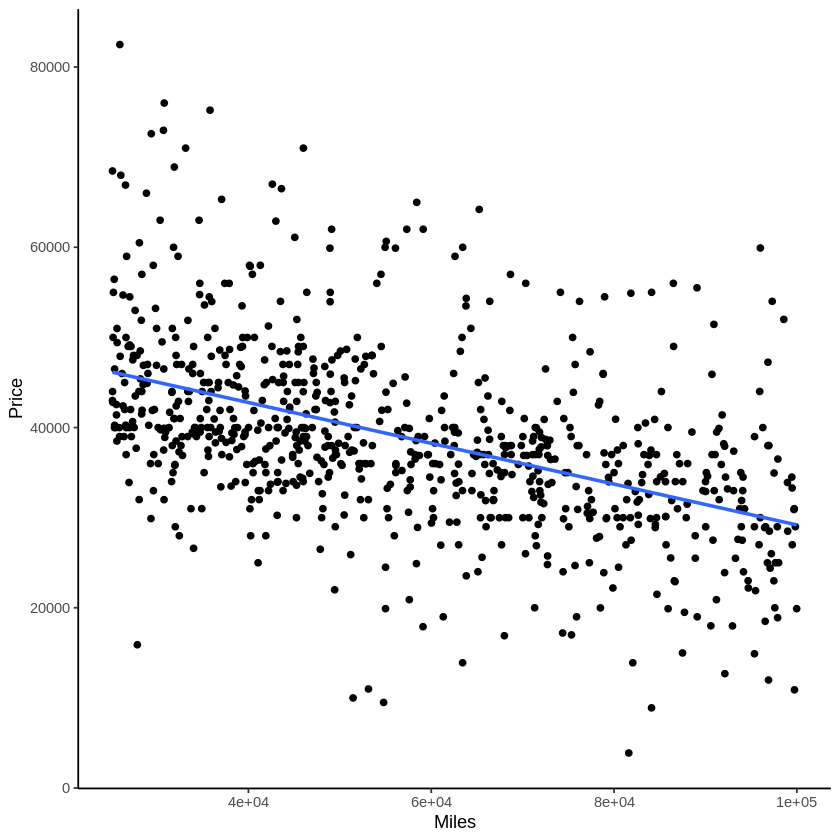

In [16]:
ggplot(data = FindCars_PickupsOnly, aes(x=Miles, y=Price)) +
  geom_point() +
  geom_smooth(method='lm', formula = y ~ x, se=FALSE) +  
  theme_classic()

### Fitting Model #2

In [14]:
Model2_Pickups <- lm(Price ~ Miles, data=FindCars_PickupsOnly )

In [15]:
summary(Model2_Pickups)


Call:
lm(formula = Price ~ Miles, data = FindCars_PickupsOnly)

Residuals:
   Min     1Q Median     3Q    Max 
-30183  -5052  -1111   3981  36534 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.182e+04  9.133e+02   56.75   <2e-16 ***
Miles       -2.263e-01  1.495e-02  -15.14   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9072 on 803 degrees of freedom
  (31 observations deleted due to missingness)
Multiple R-squared:  0.222,	Adjusted R-squared:  0.221 
F-statistic: 229.1 on 1 and 803 DF,  p-value: < 2.2e-16


### Making a prediction and getting the appropriate interval for a pickup with 45,000 miles

In [18]:
Pickups <- data.frame(Miles = c(45000))

In [19]:
predict(Model2_Pickups, newdata = Pickups)

1 
41641.01

In [21]:
predict(Model2_Pickups, newdata = Pickups, interval="confid", se=TRUE)

,fit,lwr,upr
1,41641.01,40918.14,42363.88


End of Document